In [7]:
import pandas as pd
import torch
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt
import math

In [8]:
# Assuming your test dataframe is test_df with columns: review, language, sentiment, label
def predict_sentiments(reviews, tokenizer, model):
    inputs = tokenizer(list(reviews), return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1).tolist()
    return preds

# Load your test data
test_df = pd.read_csv("../data/processed/test.csv")  # ensure review, language, sentiment, label columns exist
test_df = test_df.dropna(subset=["review", "language", "sentiment", "label"])
test_df["review"] = test_df["review"].astype(str)

In [9]:
# Evaluation
def print_metrics(y_true, y_pred, label=""):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)
    print(f"Metrics for {label if label else 'Overall'}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print("-" * 30)

In [10]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

In [11]:
def plot_confusion_matrices(df, labels, group_col="language"):
    groups = ["Overall"] + list(df[group_col].unique())
    n_cols, n_rows = 2, math.ceil(len(groups) / 2)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
    axes = axes.flatten()

    for i, group in enumerate(groups):
        data = df if group == "Overall" else df[df[group_col] == group]
        cm = confusion_matrix(data["label"], data["predicted"], labels=labels)
        ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=axes[i], cmap="Blues", colorbar=False)
        axes[i].set_title(f"Confusion Matrix - {group}")

    for j in range(len(groups), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [6]:
# Load tokenizer and model
model_name = "../model/multi/mDistilBERT/final_model"
mDistilBERT_tokenizer = AutoTokenizer.from_pretrained(model_name)
mDistilBERT_model = AutoModelForSequenceClassification.from_pretrained(model_name)
mDistilBERT_model.eval()

mDistilBERT_test_df = test_df.copy()

# Predict sentiments
mDistilBERT_test_df['predicted'] = predict_sentiments(mDistilBERT_test_df['review'], mDistilBERT_tokenizer, mDistilBERT_model)

# Overall performance
print_metrics(mDistilBERT_test_df["label"], mDistilBERT_test_df["predicted"])

# Grouped by language
for lang in mDistilBERT_test_df["language"].unique():
    sub_df = mDistilBERT_test_df[mDistilBERT_test_df["language"] == lang]
    print_metrics(sub_df["label"], sub_df["predicted"], label=f"Language: {lang}")

Metrics for Overall:
  Accuracy:  0.8778
  Precision: 0.8540
  Recall:    0.8687
  F1-Score:  0.8607
------------------------------
Metrics for Language: english:
  Accuracy:  0.9095
  Precision: 0.9032
  Recall:    0.9179
  F1-Score:  0.9098
------------------------------
Metrics for Language: romanized_nepali:
  Accuracy:  0.8435
  Precision: 0.7095
  Recall:    0.7197
  F1-Score:  0.7140
------------------------------
Metrics for Language: nepali:
  Accuracy:  0.8230
  Precision: 0.8007
  Recall:    0.8109
  F1-Score:  0.8050
------------------------------


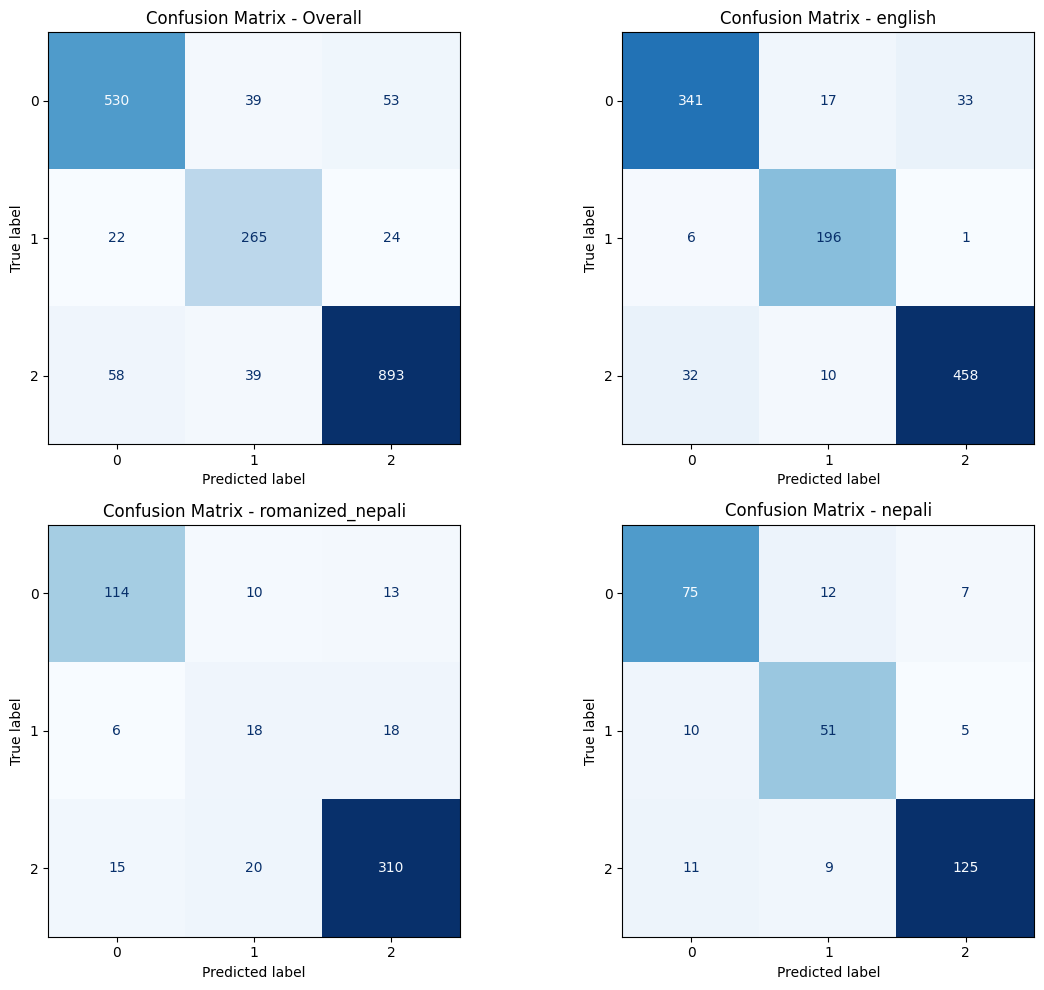

In [27]:
# Usage
all_labels = sorted(mDistilBERT_test_df["label"].unique())
plot_confusion_matrices(mDistilBERT_test_df, all_labels)

In [12]:
# Load tokenizer and model
model_name = "../model/multi/mBERT/final_model"
mBERT_tokenizer = AutoTokenizer.from_pretrained(model_name)
mBERT_model = AutoModelForSequenceClassification.from_pretrained(model_name)
mBERT_model.eval()

mBERT_test_df = test_df.copy()

# Predict sentiments
mBERT_test_df['predicted'] = predict_sentiments(mBERT_test_df['review'], mBERT_tokenizer, mBERT_model)

# Overall performance
print_metrics(mBERT_test_df["label"], mBERT_test_df["predicted"])

# Grouped by language
for lang in mBERT_test_df["language"].unique():
    sub_df = mBERT_test_df[mBERT_test_df["language"] == lang]
    print_metrics(sub_df["label"], sub_df["predicted"], label=f"Language: {lang}")

Metrics for Overall:
  Accuracy:  0.8872
  Precision: 0.8888
  Recall:    0.8872
  F1-Score:  0.8876
------------------------------
Metrics for Language: english:
  Accuracy:  0.9205
  Precision: 0.9218
  Recall:    0.9205
  F1-Score:  0.9203
------------------------------
Metrics for Language: romanized_nepali:
  Accuracy:  0.8664
  Precision: 0.8709
  Recall:    0.8664
  F1-Score:  0.8684
------------------------------
Metrics for Language: nepali:
  Accuracy:  0.8033
  Precision: 0.8017
  Recall:    0.8033
  F1-Score:  0.8023
------------------------------


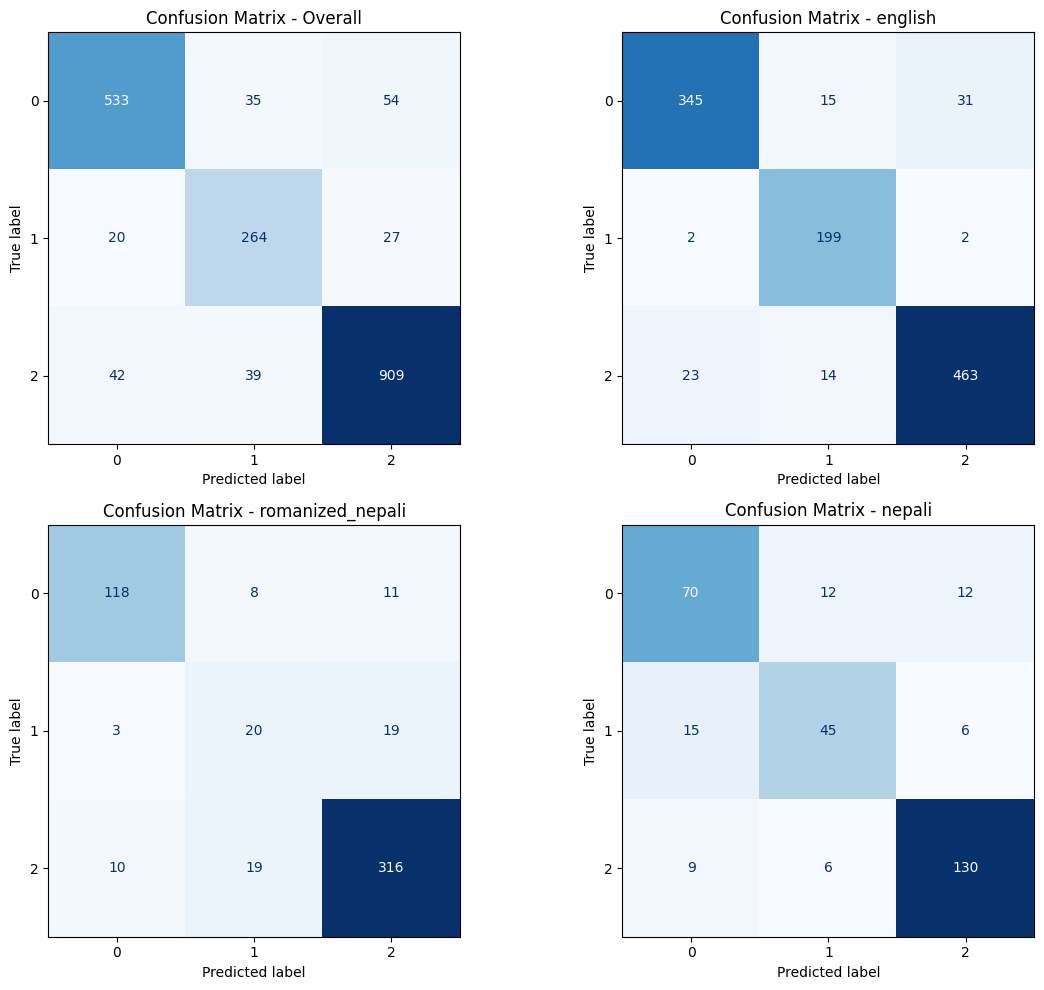

In [28]:
# Usage
all_labels = sorted(mBERT_test_df["label"].unique())
plot_confusion_matrices(mBERT_test_df, all_labels)

In [13]:
# Load tokenizer and model
model_name = "../model/multi/xlmr/final_model"
xlmr_tokenizer = AutoTokenizer.from_pretrained(model_name)
xlmr_model = AutoModelForSequenceClassification.from_pretrained(model_name)
xlmr_model.eval()

xlmr_test_df = test_df.copy()

# Predict sentiments
xlmr_test_df['predicted'] = predict_sentiments(xlmr_test_df['review'], xlmr_tokenizer, xlmr_model)

# Overall performance
print_metrics(xlmr_test_df["label"], xlmr_test_df["predicted"])

# Grouped by language
for lang in xlmr_test_df["language"].unique():
    sub_df = xlmr_test_df[xlmr_test_df["language"] == lang]
    print_metrics(sub_df["label"], sub_df["predicted"], label=f"Language: {lang}")

Metrics for Overall:
  Accuracy:  0.8981
  Precision: 0.8734
  Recall:    0.8933
  F1-Score:  0.8817
------------------------------
Metrics for Language: english:
  Accuracy:  0.9260
  Precision: 0.9145
  Recall:    0.9314
  F1-Score:  0.9215
------------------------------
Metrics for Language: romanized_nepali:
  Accuracy:  0.8645
  Precision: 0.7516
  Recall:    0.7905
  F1-Score:  0.7673
------------------------------
Metrics for Language: nepali:
  Accuracy:  0.8557
  Precision: 0.8414
  Recall:    0.8474
  F1-Score:  0.8431
------------------------------


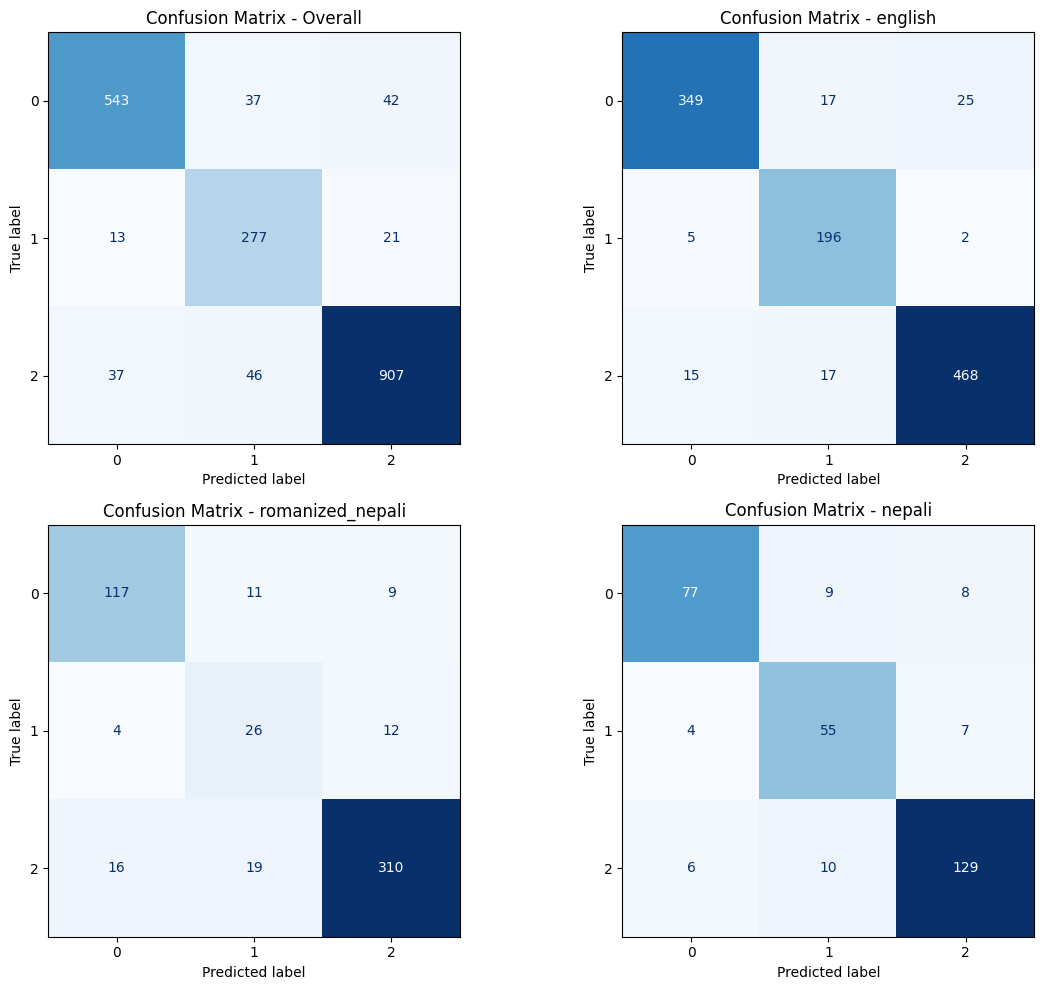

In [29]:
# Usage
all_labels = sorted(xlmr_test_df["label"].unique())
plot_confusion_matrices(xlmr_test_df, all_labels)

In [18]:
# Load tokenizer and model
model_name = "../model/nepali/indic/final_model"
indic_tokenizer = AutoTokenizer.from_pretrained(model_name)
indic_model = AutoModelForSequenceClassification.from_pretrained(model_name)
indic_model.eval()

indic_test_df = test_df.copy()
indic_test_df = indic_test_df[indic_test_df['language']=='nepali']

# Predict sentiments
indic_test_df['predicted'] = predict_sentiments(indic_test_df['review'], indic_tokenizer, indic_model)

# Overall performance
print_metrics(indic_test_df["label"], indic_test_df["predicted"])

# Grouped by language
for lang in indic_test_df["language"].unique():
    sub_df = indic_test_df[indic_test_df["language"] == lang]
    print_metrics(sub_df["label"], sub_df["predicted"], label=f"Language: {lang}")

Metrics for Overall:
  Accuracy:  0.7410
  Precision: 0.7616
  Recall:    0.7410
  F1-Score:  0.7470
------------------------------
Metrics for Language: nepali:
  Accuracy:  0.7410
  Precision: 0.7616
  Recall:    0.7410
  F1-Score:  0.7470
------------------------------


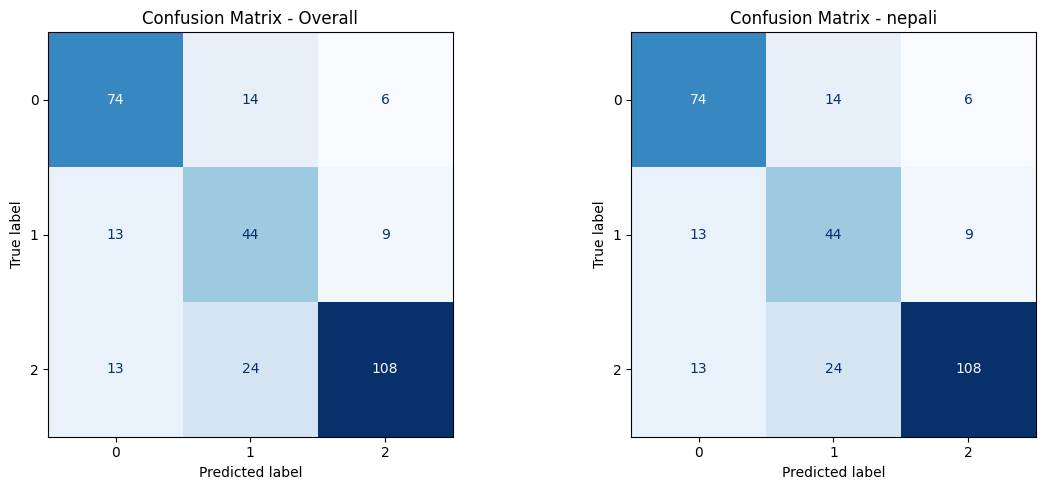

In [30]:
# Usage
all_labels = sorted(indic_test_df["label"].unique())
plot_confusion_matrices(indic_test_df, all_labels)

In [19]:
# Load tokenizer and model
model_name = "../model/nepali/nepalBERT/final_model"
nepalBERT_tokenizer = AutoTokenizer.from_pretrained(model_name)
nepalBERT_model = AutoModelForSequenceClassification.from_pretrained(model_name)
nepalBERT_model.eval()

nepalBERT_test_df = test_df.copy()
nepalBERT_test_df = nepalBERT_test_df[nepalBERT_test_df['language']=='nepali']

# Predict sentiments
nepalBERT_test_df['predicted'] = predict_sentiments(indic_test_df['review'], nepalBERT_tokenizer, nepalBERT_model)

# Overall performance
print_metrics(nepalBERT_test_df["label"], nepalBERT_test_df["predicted"])

# Grouped by language
for lang in nepalBERT_test_df["language"].unique():
    sub_df = nepalBERT_test_df[nepalBERT_test_df["language"] == lang]
    print_metrics(sub_df["label"], sub_df["predicted"], label=f"Language: {lang}")

Metrics for Overall:
  Accuracy:  0.8131
  Precision: 0.8167
  Recall:    0.8131
  F1-Score:  0.8142
------------------------------
Metrics for Language: nepali:
  Accuracy:  0.8131
  Precision: 0.8167
  Recall:    0.8131
  F1-Score:  0.8142
------------------------------


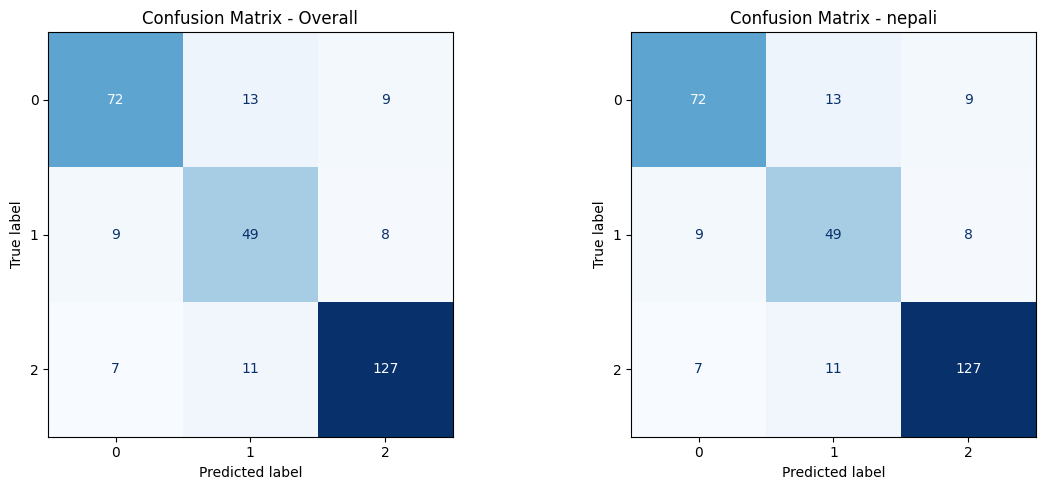

In [31]:
# Usage
all_labels = sorted(nepalBERT_test_df["label"].unique())
plot_confusion_matrices(nepalBERT_test_df, all_labels)